In [20]:
from pathlib import Path
import scipy.io
from pyannote.core.annotation import Annotation
from pyannote.core.segment import Segment

In [11]:
def get_annotations_from_transcripts(transcripts_path):
    data = {}
    for txt_file in Path(transcripts_path).glob("*.txt"):
        uri = txt_file.stem
        data[uri] = Annotation(uri=uri, modality=None)
        with open(txt_file, 'r') as f:
            lines = f.readlines()
        for ind, line in enumerate(lines):
            st, en, spk_id = line.strip().split("::")[:3]
            data[uri][Segment(float(st), float(en)), ind + 1] = spk_id
    return data

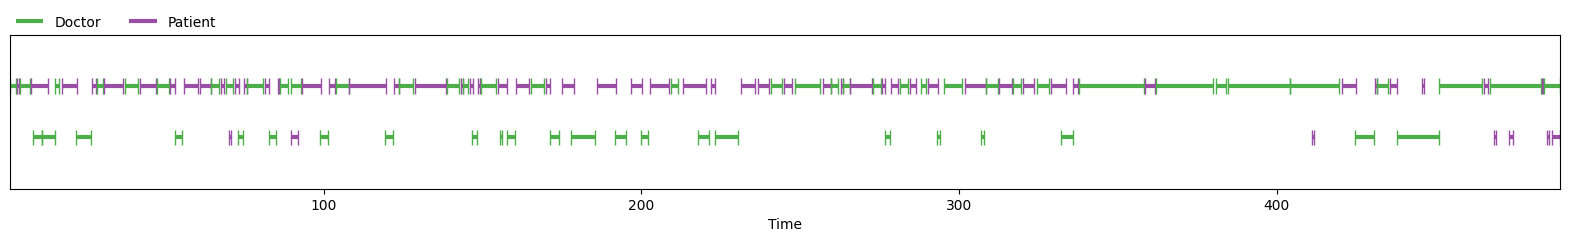

In [12]:
ref_gt = get_annotations_from_transcripts("primock57/output/joined_transcripts")
ref_gt['day5_consultation07']

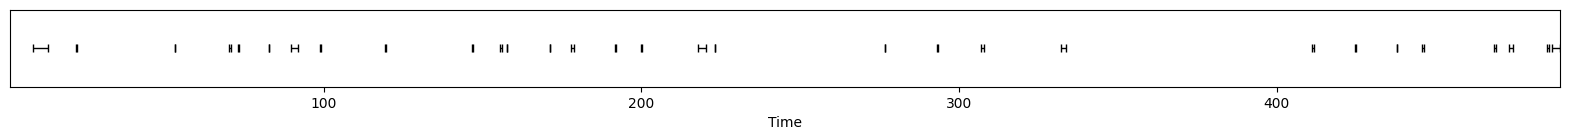

In [15]:
ref_gt['day5_consultation07'].get_overlap()

In [29]:
doctor_time = 0
patient_time = 0
overlap_time = 0
nonsilence_time = 0
overall_time = 0

audio_dir = "primock57/output/mixed_audio"

for session in ref_gt:
    # print(session)
    fs, wav = scipy.io.wavfile.read(f"{audio_dir}/{session}.wav")
    overall_time += wav.shape[0] / fs
    for seg, seg_id, spk_id in ref_gt[session].itertracks(yield_label=True):
        if spk_id == "Doctor":
            doctor_time += seg.end - seg.start
        else:
            patient_time += seg.end - seg.start
        nonsilence_time += seg.end - seg.start
    for seg in ref_gt[session].get_overlap():
        overlap_time += seg.end - seg.start

silence_time = overall_time - nonsilence_time
print(f"doctor_time: {doctor_time}, patient_time: {patient_time}, overlap_time: {overlap_time}, nonsilence_time: {nonsilence_time}, silence_time: {silence_time}, overall_time: {overall_time}")

doctor_time: 17346.998479999962, patient_time: 12935.799799999997, overlap_time: 1786.7698600000042, nonsilence_time: 30282.798280000145, silence_time: 803.501719999851, overall_time: 31086.299999999996
